In [37]:
import pandas as pd
import numpy as np # for linear algebra
import math # for math operations 

import seaborn as sns # for plotting

In [29]:
# Path to your Excel file
excel_file_path = r'C:\Users\JITENDRA\Downloads\Assignment 4.xlsx'

# Read first tab (Quarterly Series) into df1
df2 = pd.read_excel(excel_file_path, sheet_name='Quarterly Series')

# Read second tab (Monthly Series) into df2
df = pd.read_excel(excel_file_path, sheet_name='Monthly Series')


df.head(5)


,Month,Series 1
0,1992-01-01,3253
1,1992-02-01,3042
2,1992-03-01,3246
3,1992-04-01,3164
4,1992-05-01,3211


In [30]:
# Import the relevant libraries 
import matplotlib as plt
from sklearn import preprocessing 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)
# Python set up
import warnings
import itertools
from pandas import datetime
from pandas import read_csv
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') 
import seaborn as sns  
sns.set(style="whitegrid")


In [31]:
# Check for missing values in df1
missing_values = df.isna().sum()

# Display the count of missing values for each column
print("Missing values in df1:")
print(missing_values)


Missing values in df1:
Month       0
Series 1    0
dtype: int64


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     204 non-null    datetime64[ns]
 1   Series 1  204 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.3 KB


In [33]:
df.index = pd.to_datetime(df.Month)
df = df.drop(['Month'], axis=1)

In [34]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2008-03-01', '2008-04-01', '2008-05-01', '2008-06-01',
               '2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01'],
              dtype='datetime64[ns]', name='Month', length=204, freq=None)

In [35]:
df.columns

Index(['Series 1'], dtype='object')

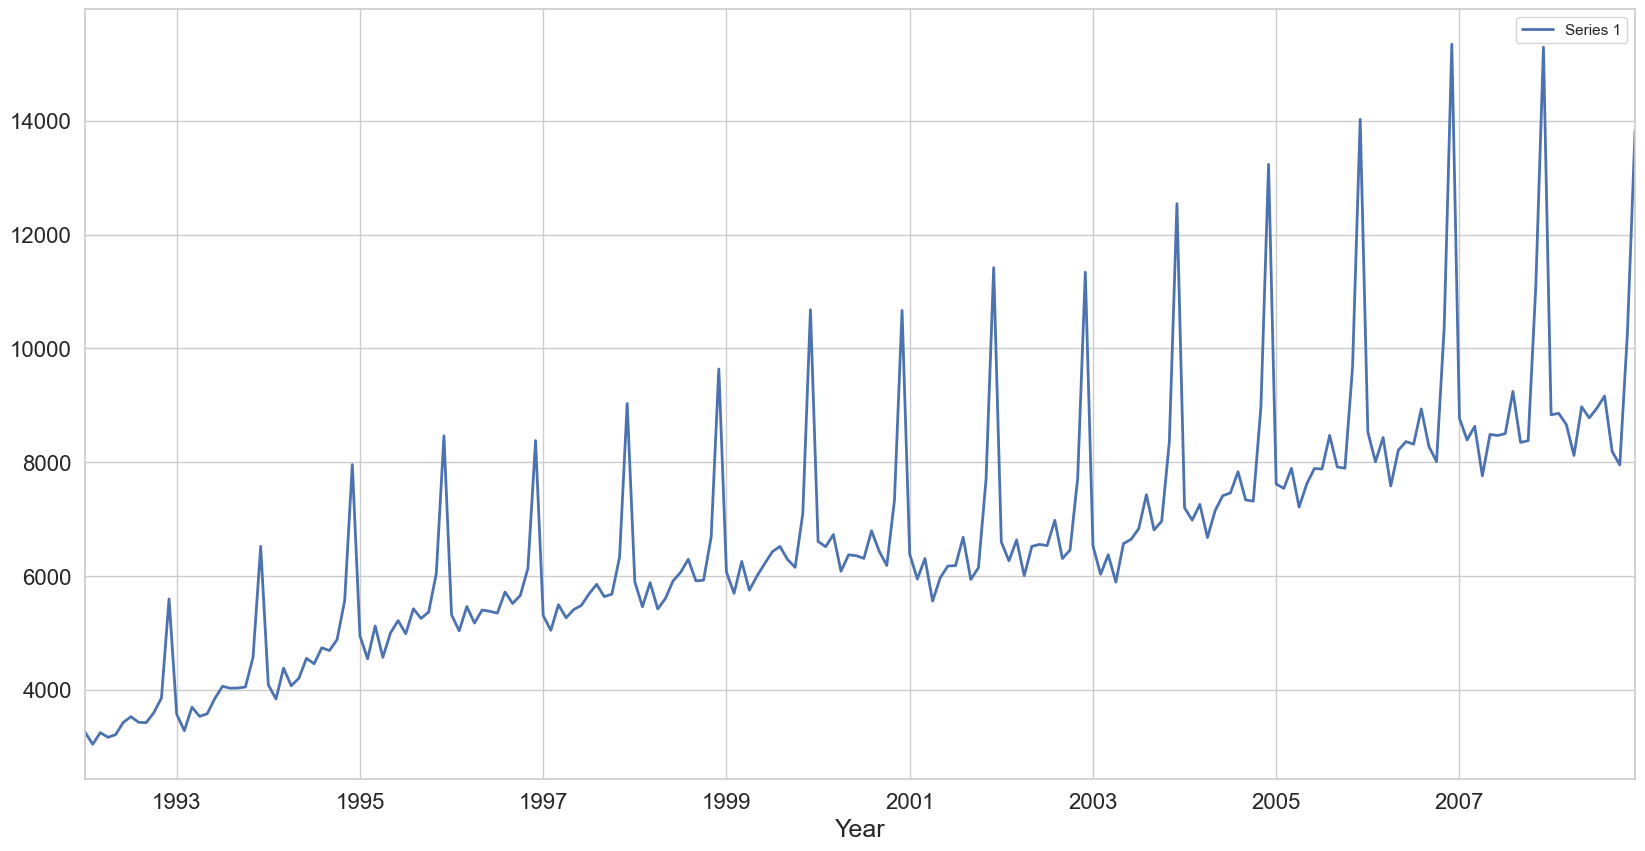

In [36]:
df.plot(figsize=(20,10), linewidth=2, fontsize=16)
plt.xlabel('Year', fontsize=18);

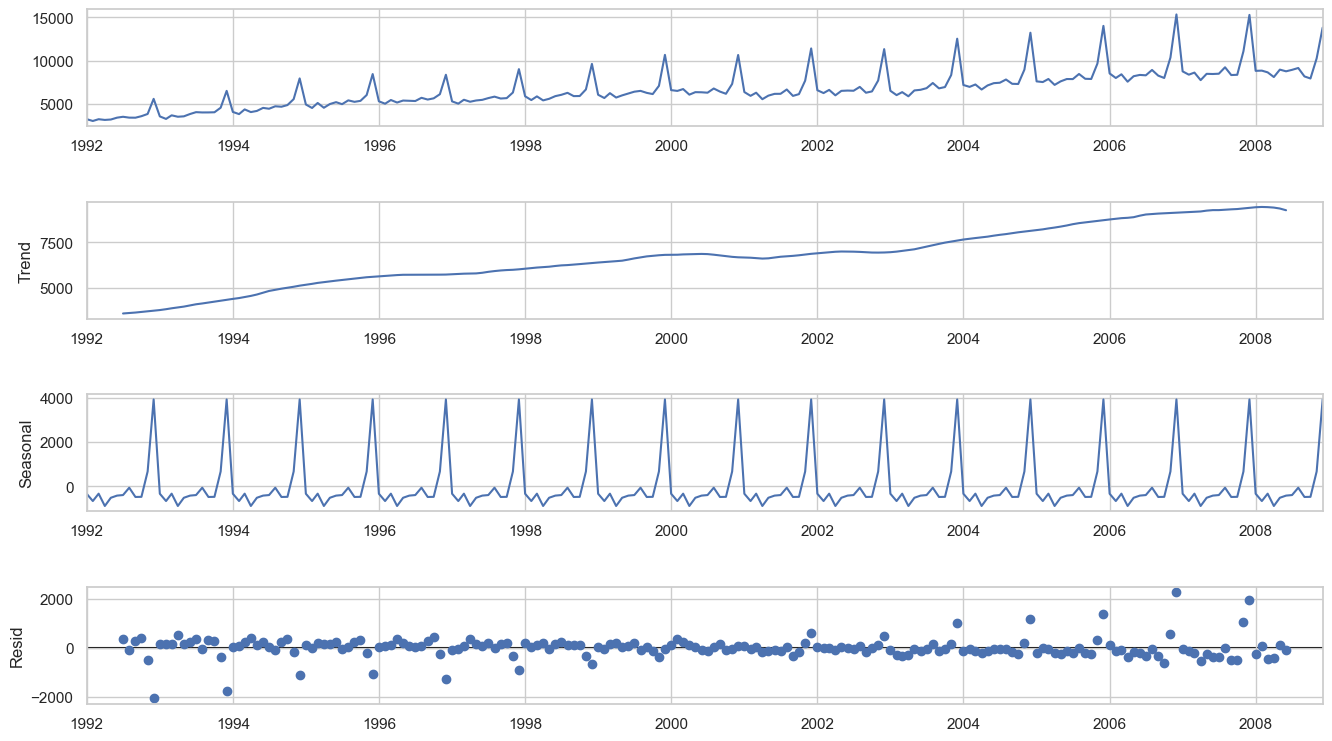

In [14]:
decomposition = seasonal_decompose(df, model='additive'); 
fig = decomposition.plot();
fig.set_size_inches(15, 8);

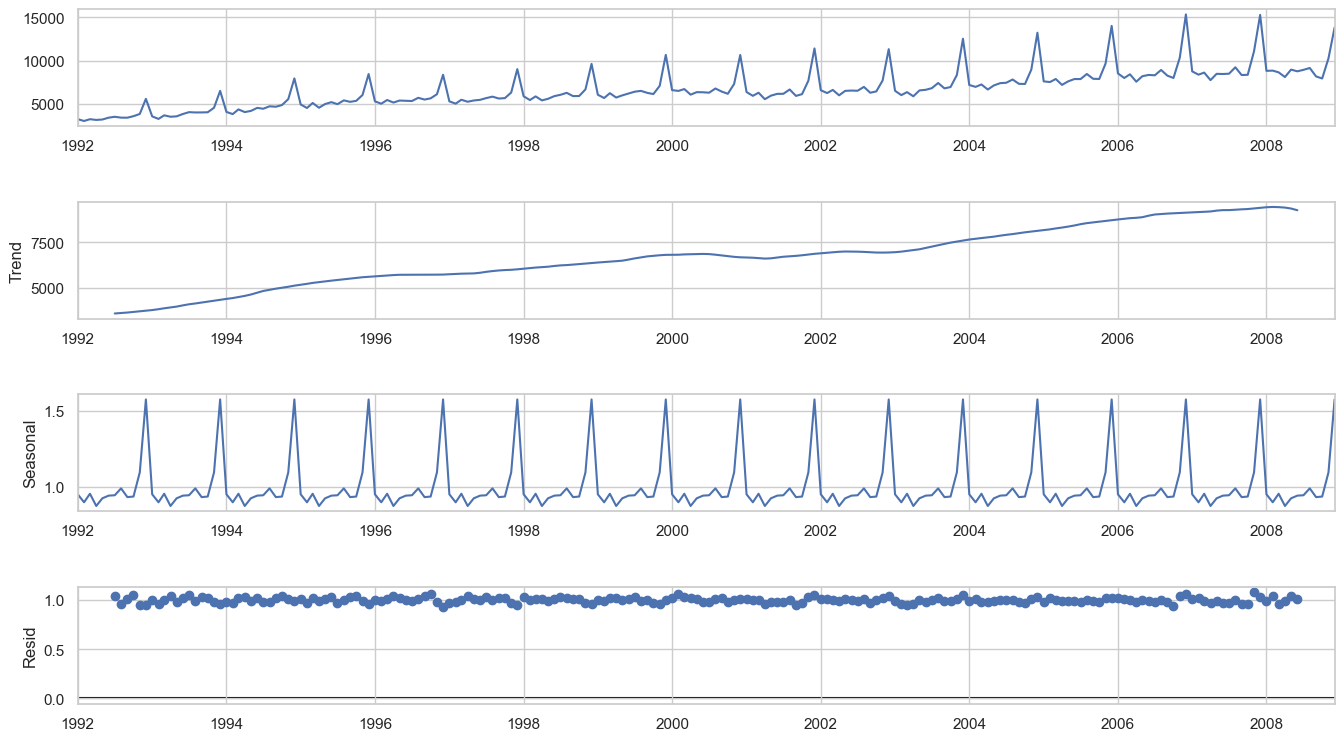

In [15]:
decomposition = seasonal_decompose(df, model='multiplicative')  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [16]:
#ADF Test
adfuller(df['Series 1'])

(-1.9282141763448954,
 0.318906869618499,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 2588.1481903373733)

In [17]:
# ADF Test with better readable output
result = adfuller(df['Series 1'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.9282141763448954
p-value: 0.318906869618499
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


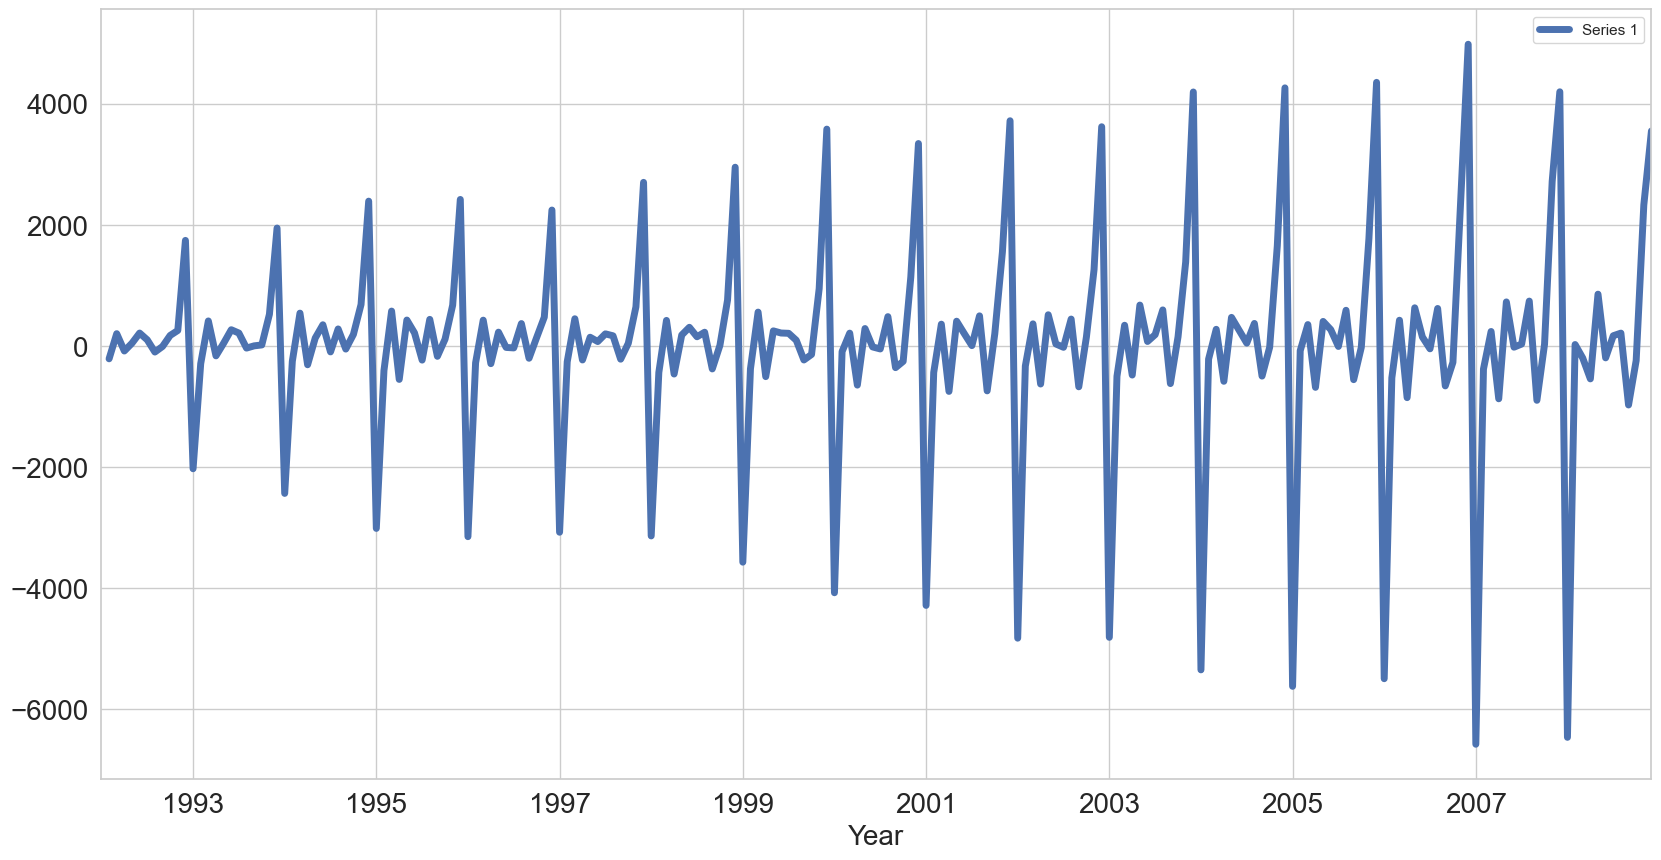

In [18]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

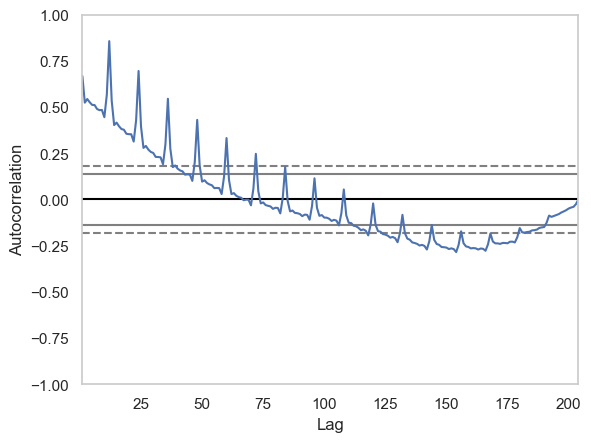

In [19]:
autocorrelation_plot(df);

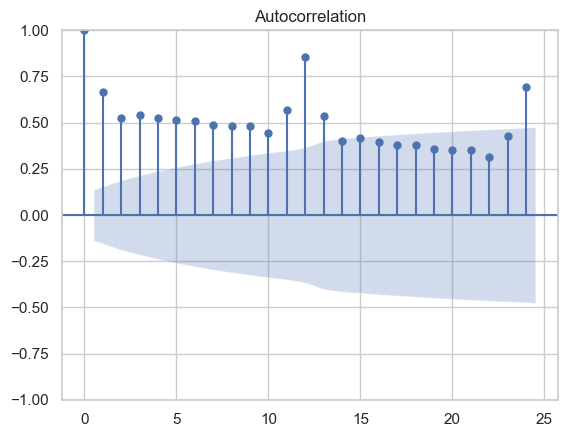

In [20]:
plot_acf(df);

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


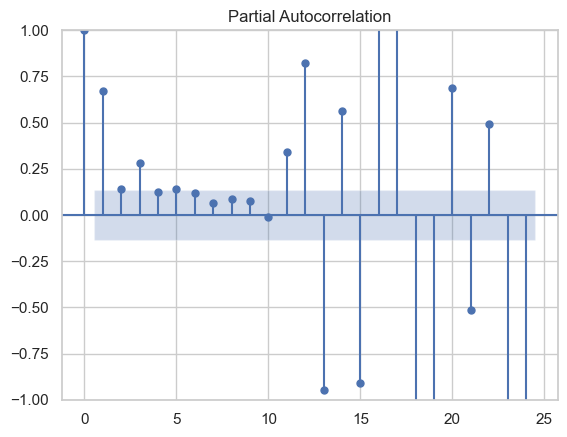

In [21]:
plot_pacf(df);

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df, order=(1, 1, 1))
results = model.fit()
print(results.summary())

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Series 1   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1758.859
Date:                Thu, 11 Apr 2024   AIC                           3523.718
Time:                        10:14:24   BIC                           3533.657
Sample:                    01-01-1992   HQIC                          3527.739
                         - 12-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2350      0.113      2.071      0.038       0.013       0.457
ma.L1         -0.9054      0.074    -12.291      0.000      -1.050      -0.761
sigma2      1.948e+06   1.17e+05     16.673      0.0

<Axes: xlabel='Month'>

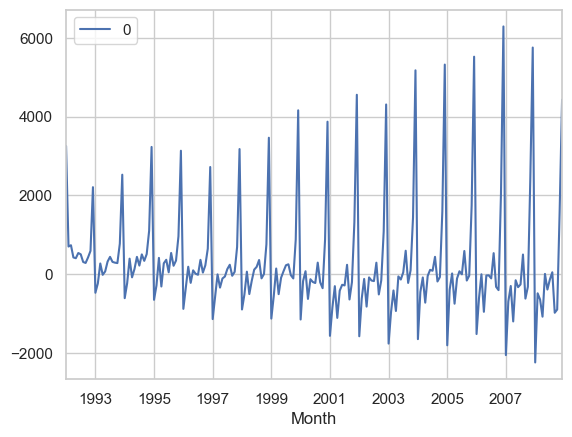

In [23]:
# plot residual errors
residuals = pd.DataFrame(results.resid)
residuals.plot()

<Axes: ylabel='Density'>

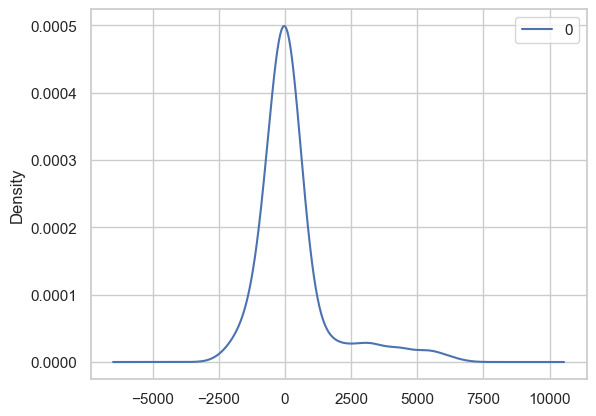

In [24]:
residuals.plot(kind='kde')

In [25]:
print(residuals.describe())

                 0
count   204.000000
mean    293.194706
std    1386.518070
min   -2238.564814
25%    -329.359992
50%      -3.515239
75%     417.411199
max    6286.586697


In [39]:
# Define the p, d and q parameters 
# In our example, we only take values between 0 and 2 to make the computation faster
p = d = q = range(1, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 1, 2) x (1, 2, 1, 12)
SARIMAX: (1, 2, 1) x (1, 2, 2, 12)
SARIMAX: (1, 2, 1) x (2, 1, 1, 12)


In [40]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = smf.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2447.1569223605243
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:2286.9838059444437
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:2297.359936700618
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:2125.833872562029
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:2300.011579771094
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:2288.979744727161
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:2144.6564178356302
ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:2119.952925899592
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:2429.192531568857
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:2270.7670967986833
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:2280.9094312705365
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:2112.937182605865
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:2297.4432072827326
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:2272.6929998929636
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:2142.582364454757
ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:2106.001549194416
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:2441.543081779397
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:2278.856363823954
ARI

In [41]:
results.aic

2095.2350464875326

In [42]:
mod = smf.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0836      0.278      0.301      0.764      -0.461       0.628
ma.L1         -0.3909      0.245     -1.594      0.111      -0.871       0.090
ar.S.L12       0.5451      0.183      2.976      0.003       0.186       0.904
ma.S.L12      -0.5383      0.194     -2.768      0.006      -0.919      -0.157
sigma2       5.54e+04   4465.691     12.406      0.000    4.66e+04    6.42e+04


In [43]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

# Print the summary table
print(results.summary().tables[1])

# Check and correct p-values
p_values = results.pvalues
significant_coeffs = p_values[p_values < 0.05]
print("\nSignificant coefficients:")
print(significant_coeffs)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0836      0.278      0.301      0.764      -0.461       0.628
ma.L1         -0.3909      0.245     -1.594      0.111      -0.871       0.090
ar.S.L12       0.5451      0.183      2.976      0.003       0.186       0.904
ma.S.L12      -0.5383      0.194     -2.768      0.006      -0.919      -0.157
sigma2       5.54e+04   4465.691     12.406      0.000    4.66e+04    6.42e+04

Significant coefficients:
ar.S.L12    2.923966e-03
ma.S.L12    5.640812e-03
sigma2      2.426538e-35
dtype: float64


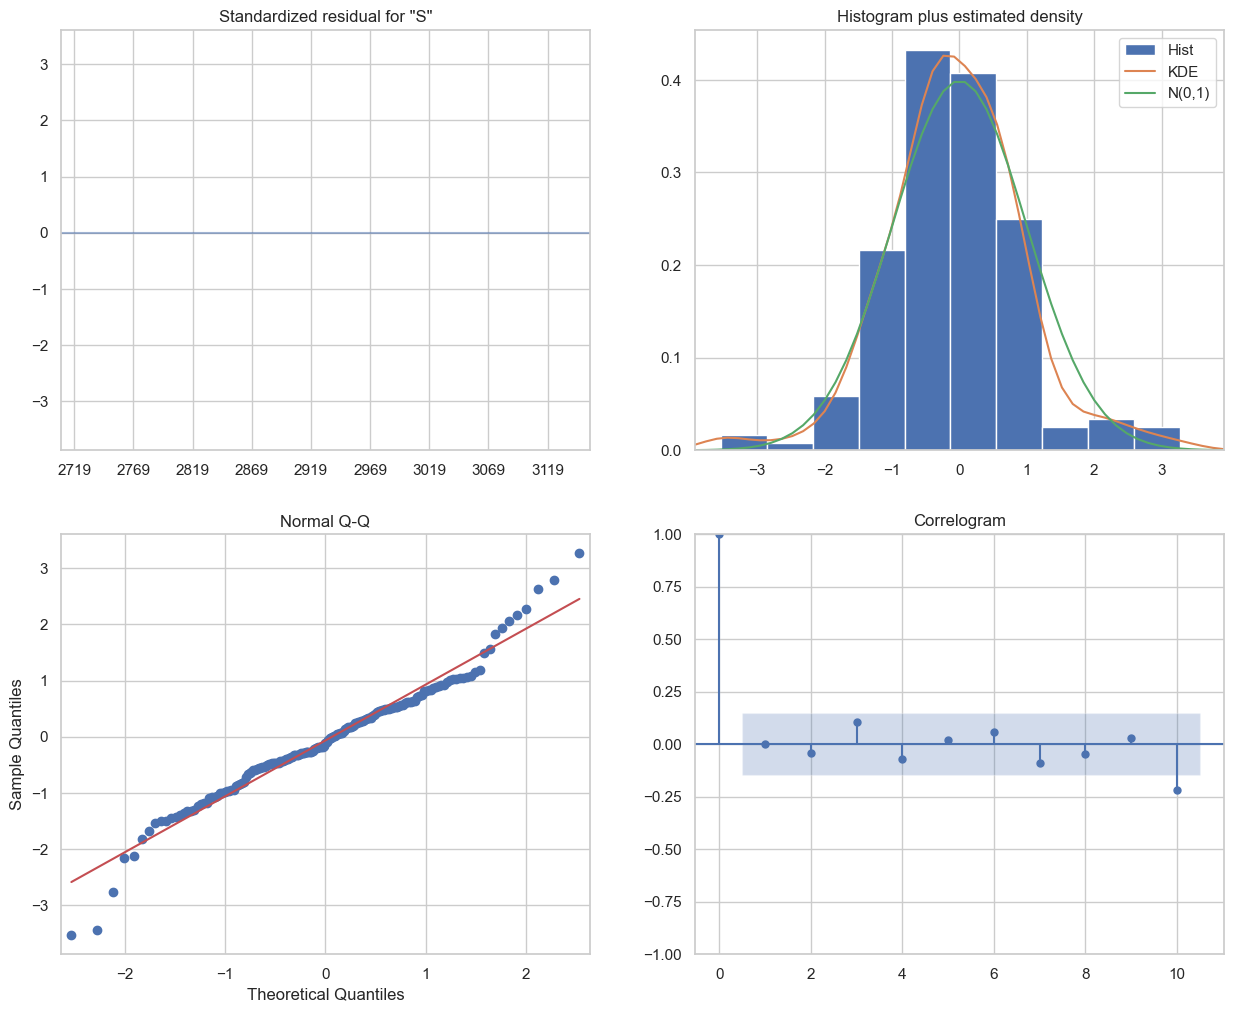

In [44]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2023-06-30'), dynamic=False)
pred_ci = pred.conf_int()

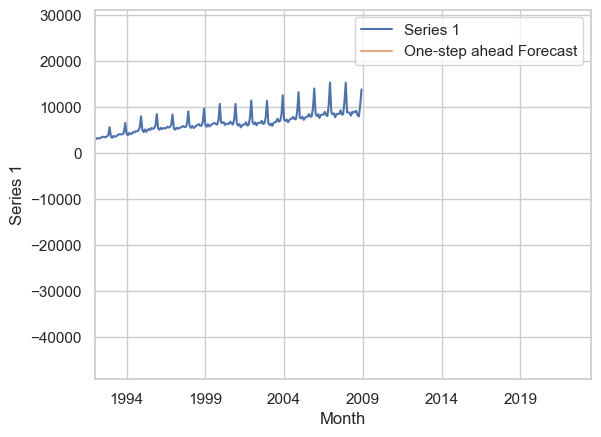

In [46]:
ax = df['1992':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('Month')
ax.set_ylabel('Series 1')
plt.legend()

plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Shift actual values by one time step
naive_forecast = df['Series 1'].shift(1).dropna()  
actual_values = df['Series 1'].iloc[1:]  # Exclude the first element to match the length of naive forecast

# Calculate RMSE for the naive forecast
rmse_naive = sqrt(mean_squared_error(actual_values, naive_forecast))

# Calculate MAPE
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_naive = MAPE(actual_values, naive_forecast)

# Print RMSE and MAPE for the naive forecast
print('Root Mean Squared Error (RMSE) for the naive forecast:', rmse_naive)
print('Mean Absolute Percentage Error (MAPE) for the naive forecast:', MAPE_naive)

# Print forecasted values for the next 12 months
print('Forecasted values for the next 12 months:')
print(forecast_mean)


Root Mean Squared Error (RMSE) for the naive forecast: 1682.5326397261488
Mean Absolute Percentage Error (MAPE) for the naive forecast: 12.720357519906237
Forecasted values for the next 12 months:
2009-01-01     7627.041468
2009-02-01     7676.673664
2009-03-01     7477.025049
2009-04-01     6936.893629
2009-05-01     7794.477412
2009-06-01     7597.528771
2009-07-01     7768.592764
2009-08-01     7978.653682
2009-09-01     7004.044947
2009-10-01     6763.738272
2009-11-01     9091.891382
2009-12-01    12637.204874
Freq: MS, Name: predicted_mean, dtype: float64


In [50]:
# Calculate mean absolute error of a naive forecast
naive_forecast = df['Series 1'].shift(1).dropna()  # Shift actual values by one time step
mean_abs_error_naive = (df['Series 1'] - naive_forecast).abs().mean()

# Calculate MAPE
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_naive = MAPE(df['Series 1'], naive_forecast)

# Print MAPE for the naive forecast
print('Mean Absolute Percentage Error (MAPE) for the naive forecast:', MAPE_naive)

# Print forecasted values for the next 12 months
print('Forecasted values for the next 12 months:')
print(forecast_mean)


Mean Absolute Percentage Error (MAPE) for the naive forecast: 12.720357519906237
Forecasted values for the next 12 months:
2009-01-01     7627.041468
2009-02-01     7676.673664
2009-03-01     7477.025049
2009-04-01     6936.893629
2009-05-01     7794.477412
2009-06-01     7597.528771
2009-07-01     7768.592764
2009-08-01     7978.653682
2009-09-01     7004.044947
2009-10-01     6763.738272
2009-11-01     9091.891382
2009-12-01    12637.204874
Freq: MS, Name: predicted_mean, dtype: float64
